## Random Forest klasifikatorius

In [1]:
# Bibliotekų importavimas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Nuskaitome duomenų failą
df = pd.read_csv('data_visi_v2.csv')
df

,KIEKIS,PIRM_REG_METAI_LT,PIRM_REG_MEN_LT
0,87,2001,1
1,267,2001,2
2,371,2001,3
3,406,2001,4
4,456,2001,5
...,...,...,...
276,11914,2024,1
277,13368,2024,2
278,16130,2024,3
279,17435,2024,4


In [3]:
# Kategorijų kūrimas pagal registracijų kiekį
bins = [0, 5000, 15000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['DIDUMAS'] = pd.cut(df['KIEKIS'], bins=bins, labels=labels)
df

,KIEKIS,PIRM_REG_METAI_LT,PIRM_REG_MEN_LT,DIDUMAS
0,87,2001,1,Low
1,267,2001,2,Low
2,371,2001,3,Low
3,406,2001,4,Low
4,456,2001,5,Low
...,...,...,...,...
276,11914,2024,1,Medium
277,13368,2024,2,Medium
278,16130,2024,3,High
279,17435,2024,4,High


In [4]:
# Priskiriame duomenis
X = df.drop(columns=['KIEKIS', 'DIDUMAS'])
y = df['DIDUMAS']

In [5]:
# Padaliname duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Sukuriame Random Forest klasifikatorių
classifier = RandomForestClassifier(random_state=42)

In [8]:

# Nustatome hiperparametrų tinklą
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [9]:
# Naudojame GridSearchCV geriausiems parametrams rasti
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [10]:
# Geriausi parametrai
best_params = grid_search.best_params_

# Geriausias modelis
best_model = grid_search.best_estimator_

In [11]:

# Atliekame prognozes su geriausiu modeliu
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

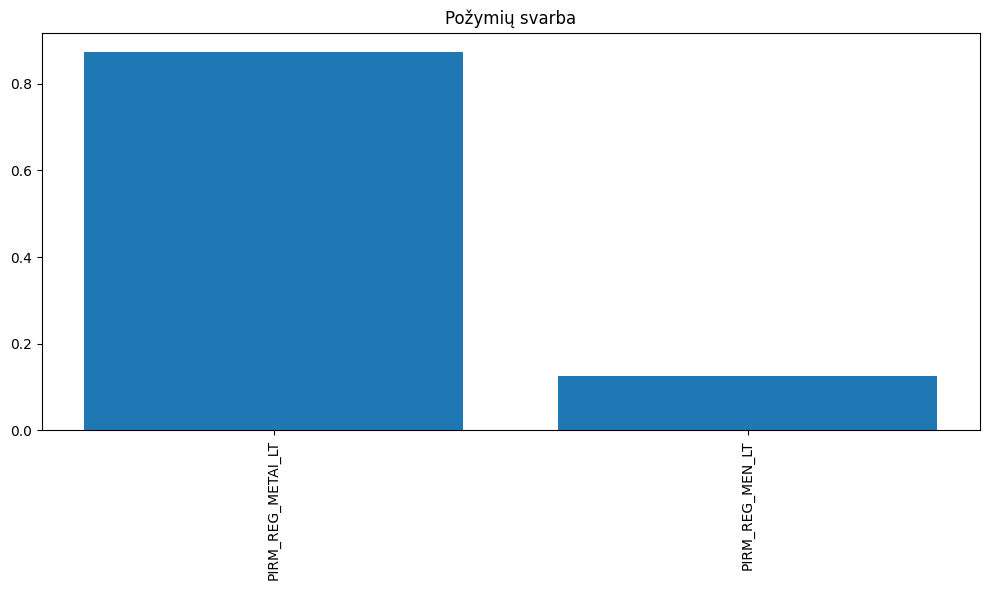

Geriausi parametrai: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Treniravimo tikslumas: 0.9375
Testavimo tikslumas: 0.8421052631578947
Kryžminės validacijos (cv=5) tikslumo reikšmės: [0.84397163 0.80714286]
Kryžminės validacijos (cv=5) vidutinis tikslumas: 0.8255572441742655
Kryžminės validacijos (cv=10) tikslumo reikšmės: [0.84397163 0.80714286]
Kryžminės validacijos (cv=10) vidutinis tikslumas: 0.8255572441742655


In [12]:

# Vertiname modelį
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Kryžminė validacija su pilnu duomenų rinkiniu
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=2, scoring='accuracy')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=2, scoring='accuracy')

# Požymių svarba
feature_importances = best_model.feature_importances_
features = X.columns

# Požymių svarbos vizualizacija
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Požymių svarba")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

print(f'Geriausi parametrai: {best_params}')
print(f'Treniravimo tikslumas: {train_accuracy}')
print(f'Testavimo tikslumas: {test_accuracy}')

print(f'Kryžminės validacijos (cv=5) tikslumo reikšmės: {cv_scores_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis tikslumas: {cv_scores_5.mean()}')

print(f'Kryžminės validacijos (cv=10) tikslumo reikšmės: {cv_scores_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis tikslumas: {cv_scores_10.mean()}')
